<a href="https://colab.research.google.com/github/Himanshut504/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cardiovascular Risk Prediction 
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. 
- The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). 
- The dataset provides the patients’ information. 
- It includes over 4,000 records and 15 attributes.

#### Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

### Data Description
Demographic:
-  Sex: male or female("M" or "F")
-  Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
-  is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
-  Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
-  BP Meds: whether or not the patient was on blood pressure medication (Nominal)
-  Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
-  Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
-  Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
-  Tot Chol: total cholesterol level (Continuous)
-  Sys BP: systolic blood pressure (Continuous)
-  Dia BP: diastolic blood pressure (Continuous)
-  BMI: Body Mass Index (Continuous)
-  Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
-  Glucose: glucose level (Continuous)
Predict variable (desired target)
-  10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
# help(warnings)
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
df.isnull().sum()/df['id'].count() * 100

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

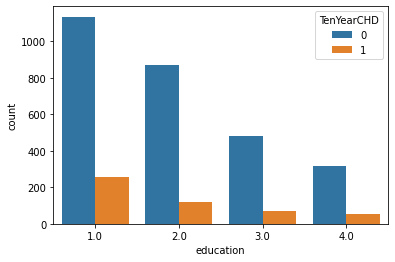

In [ ]:
sns.countplot(data=df, x='education', hue='TenYearCHD')

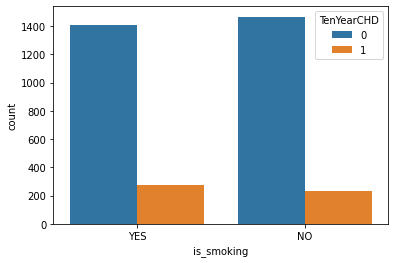

In [ ]:
sns.countplot(data=df, x='is_smoking', hue='TenYearCHD')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

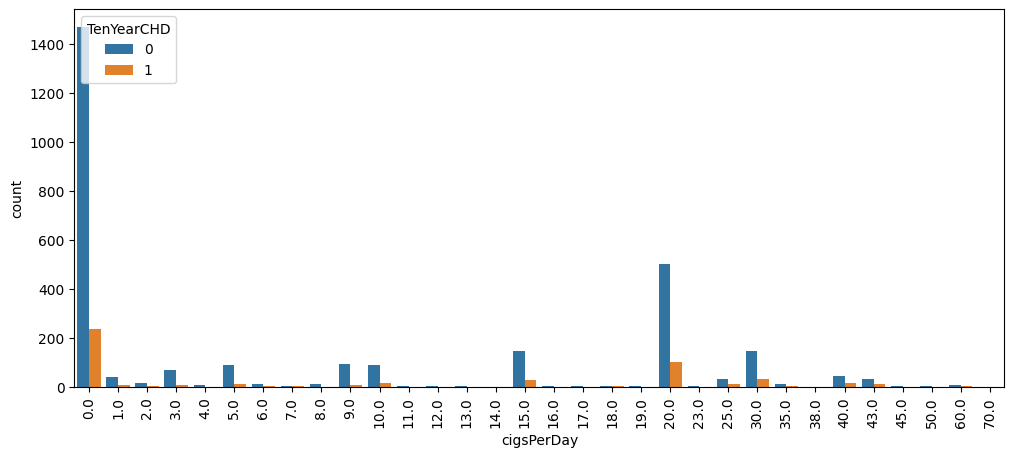

In [ ]:
#cigsPerDay       
plt.figure(figsize=(12,5), dpi=100)
sns.countplot(data=df, x='cigsPerDay', hue='TenYearCHD')
plt.xticks(rotation=90)

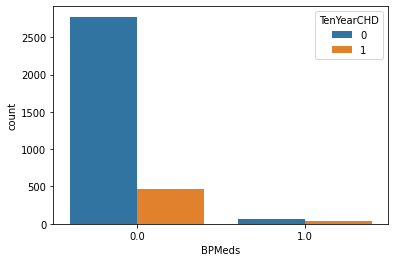

In [ ]:
sns.countplot(data=df, x='BPMeds', hue='TenYearCHD')

(-0.5, 1.5)

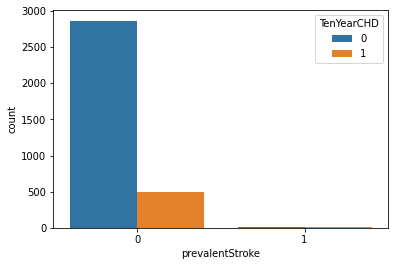

In [ ]:
sns.countplot(data=df, x='prevalentStroke', hue='TenYearCHD')
plt.xlim()

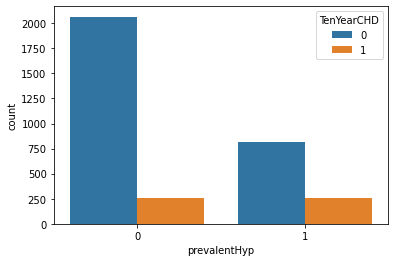

In [ ]:
sns.countplot(data=df, x='prevalentHyp', hue='TenYearCHD')

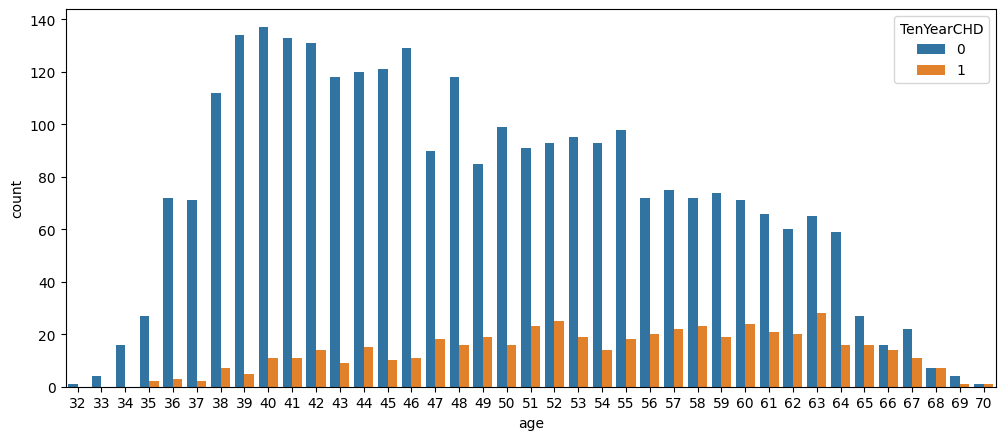

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
sns.countplot(data=df, x='age', hue='TenYearCHD')
#plt.xticks(rotation=60)

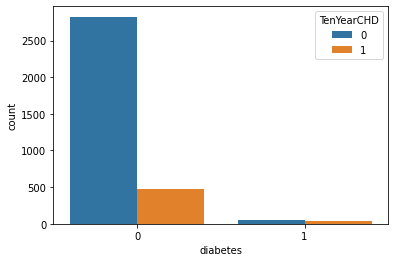

In [ ]:
#Diabetes
sns.countplot(data=df, x='diabetes', hue='TenYearCHD')

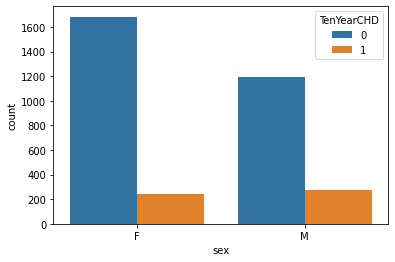

In [ ]:
#Cardiovascular Risk Man vs Women
sns.countplot(data=df, x='sex', hue='TenYearCHD')

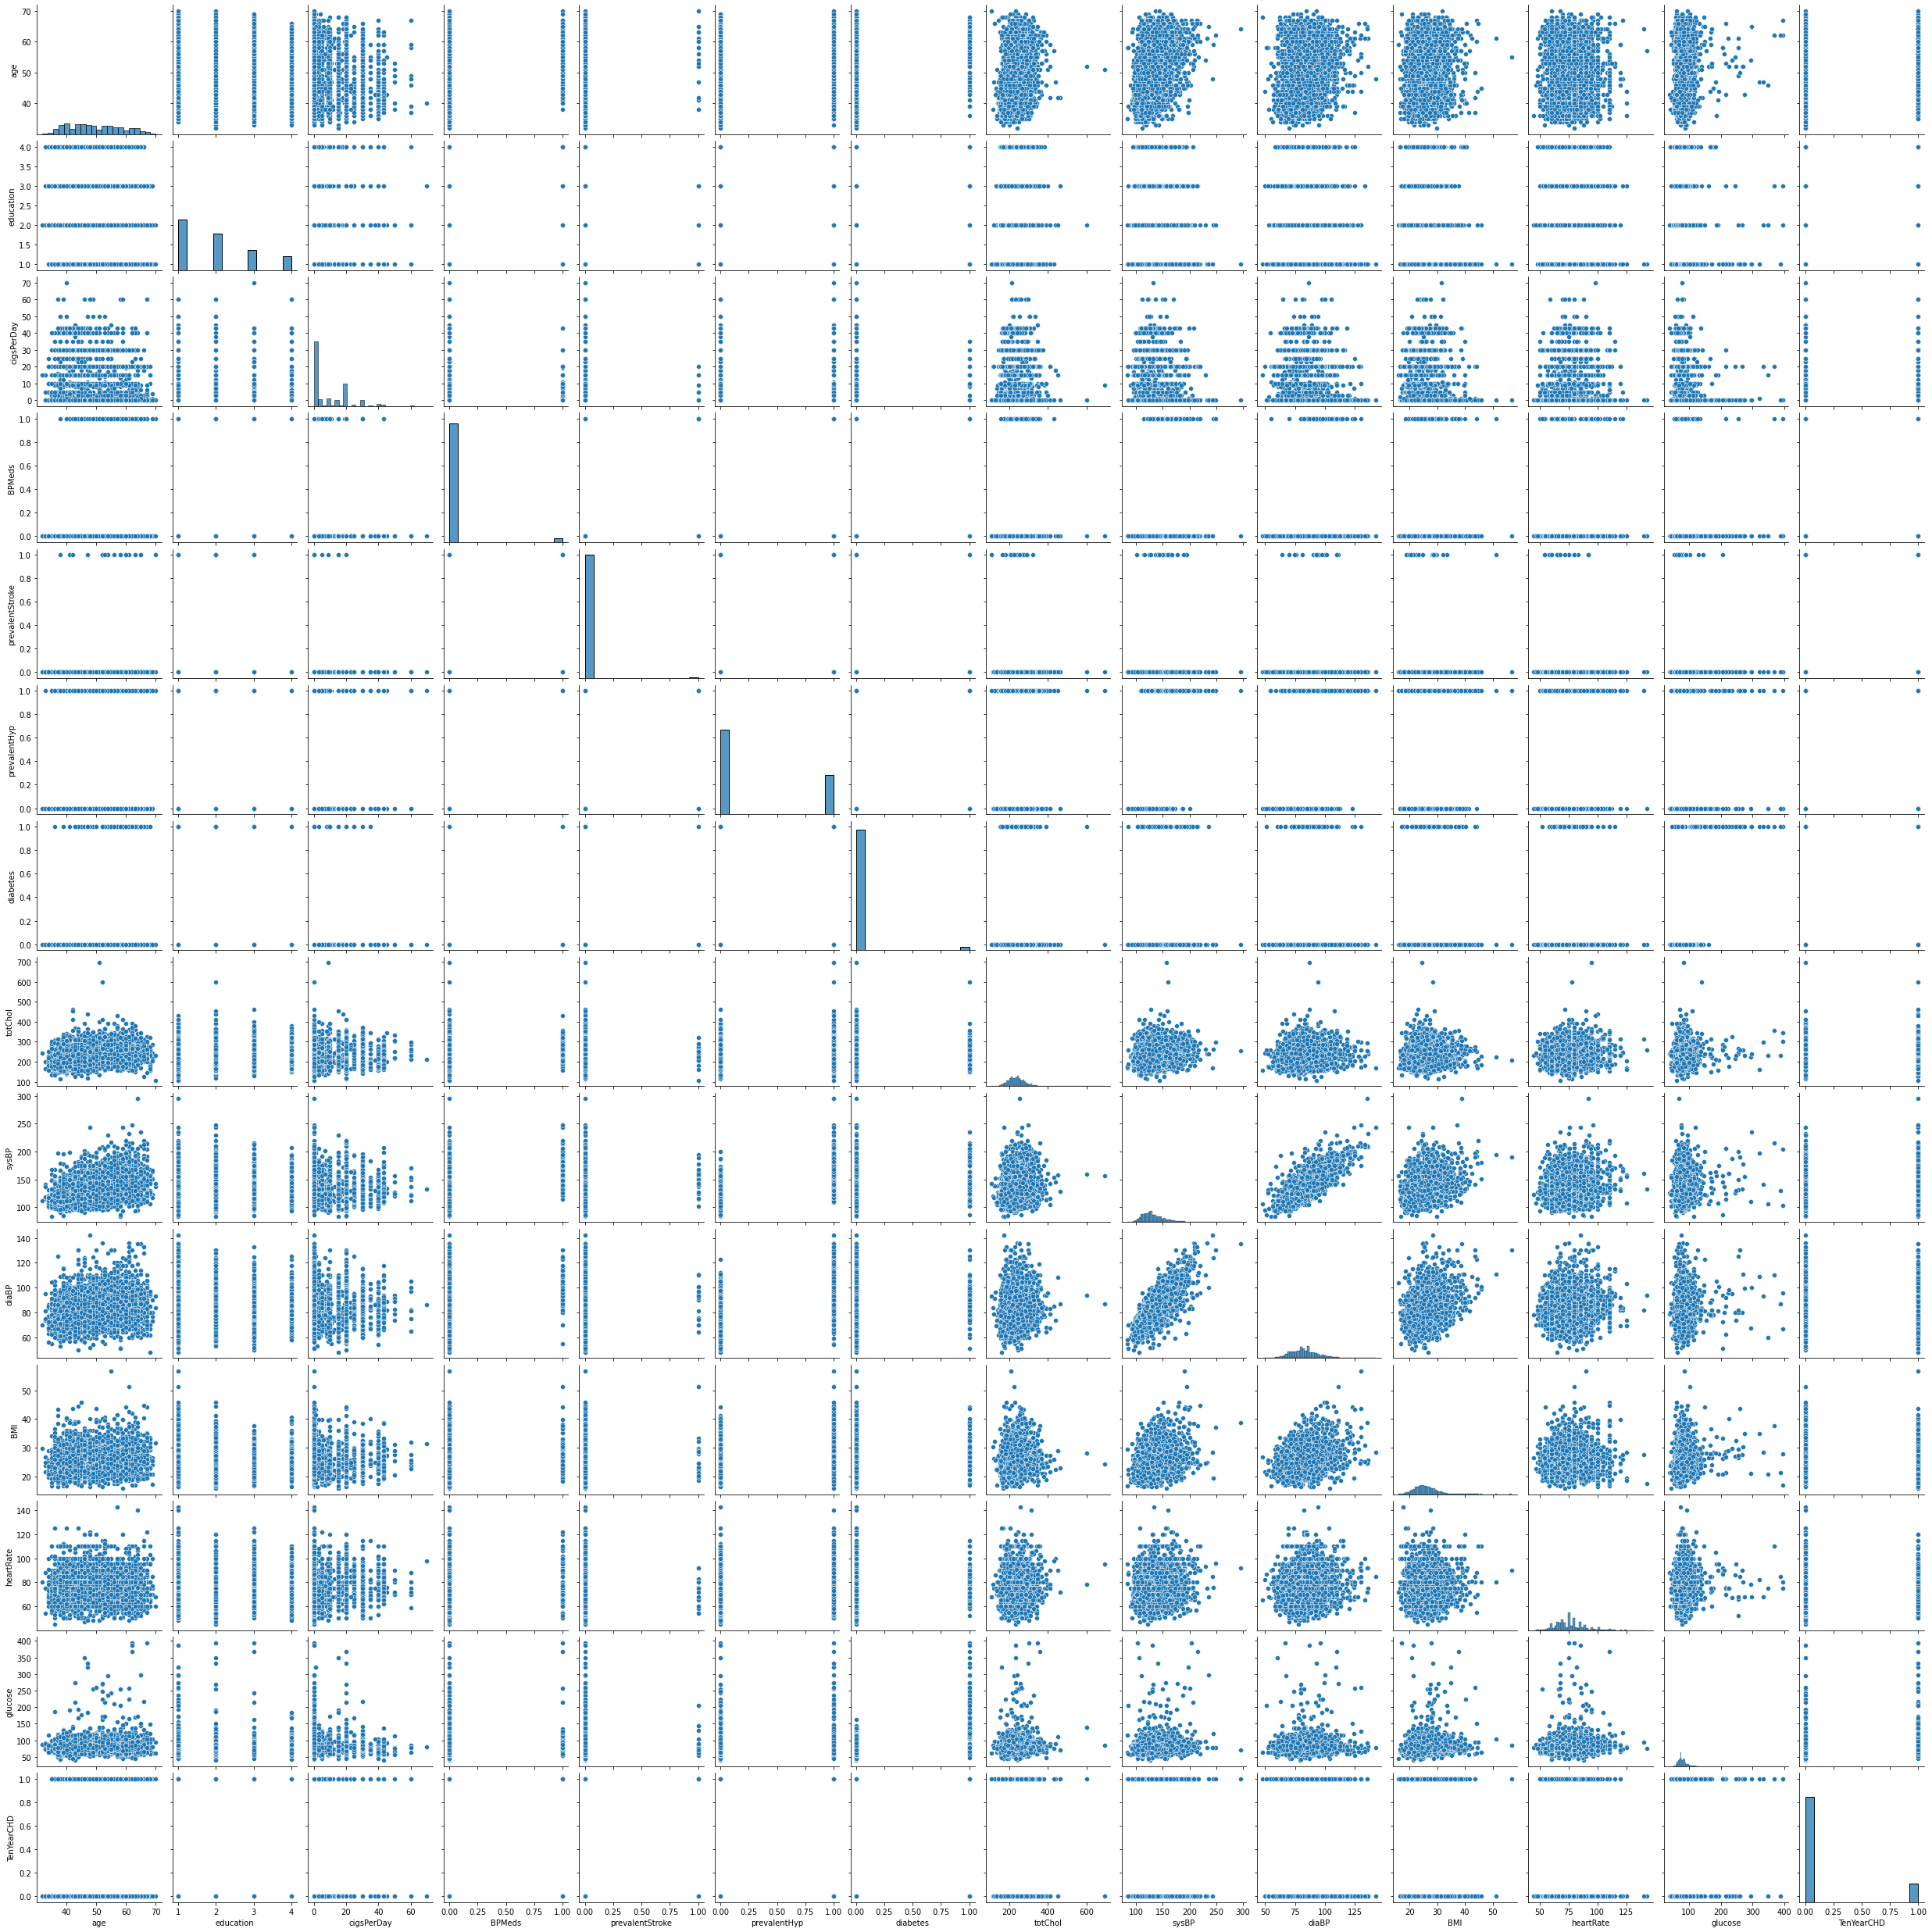

In [ ]:
sns.pairplot(data=df.drop(('id'), axis=1))

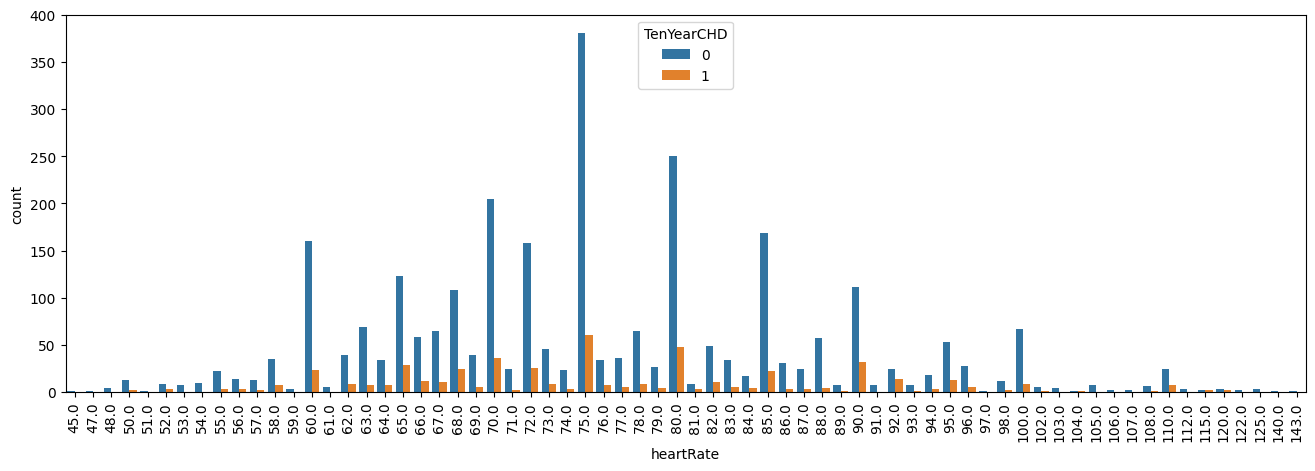

In [ ]:
plt.figure(figsize=(16,5), dpi=100)
sns.countplot(data=df, x='heartRate', hue='TenYearCHD')
plt.xticks(rotation=90);

In [ ]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

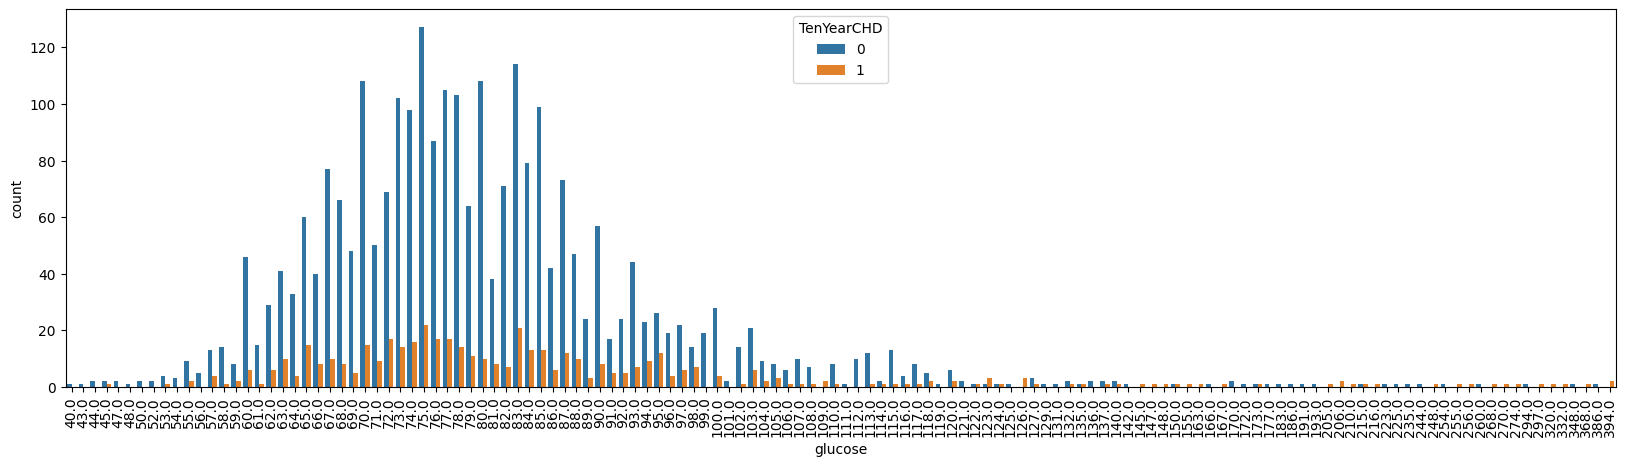

In [ ]:
plt.figure(figsize=(20,5), dpi=100)
sns.countplot(data=df, x='glucose', hue='TenYearCHD')
plt.xticks(rotation=90);

## Multivariate analysis 

In [ ]:
df1=df.drop('id', axis=1)

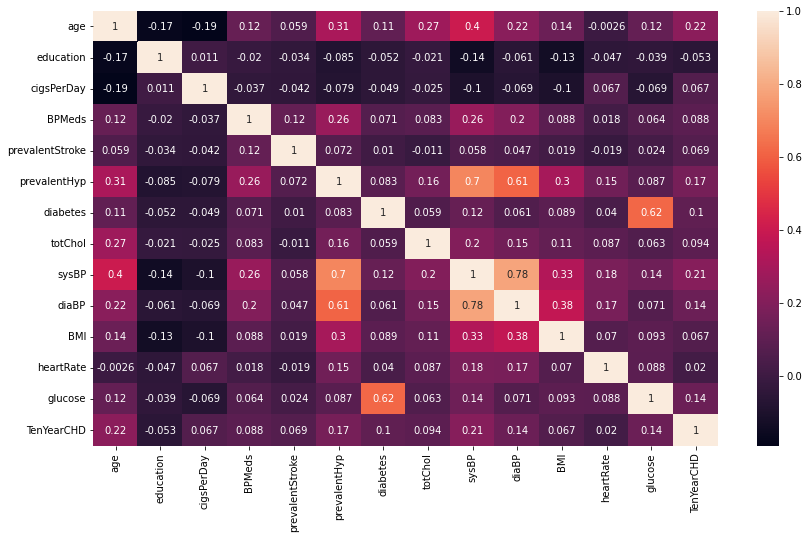

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df1.corr( ), annot=True)

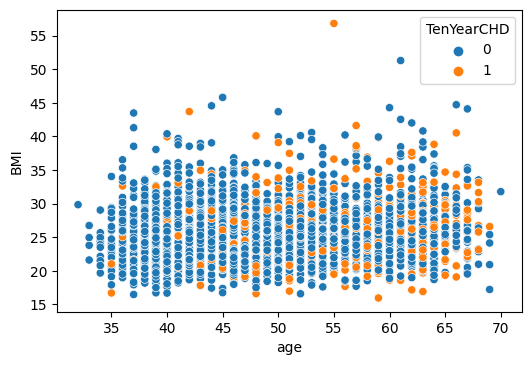

In [ ]:
plt.figure(dpi=100)
sns.scatterplot(data=df1, x='age', y='BMI', hue='TenYearCHD')

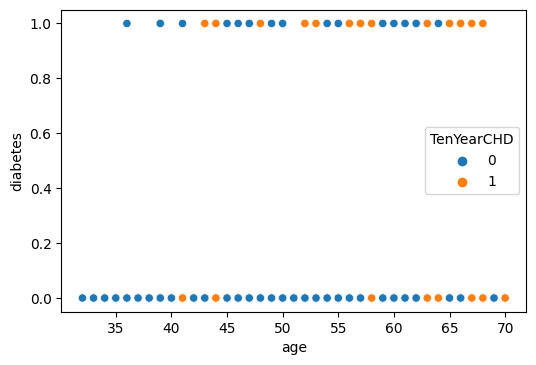

In [ ]:
plt.figure(dpi=100)
sns.scatterplot(data=df1, y='diabetes', x='age', hue='TenYearCHD')

In [ ]:
df['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

In [ ]:
pd.DataFrame(df1.groupby('diabetes')['TenYearCHD'].value_counts())

TenYearCHD
diabetes TenYearCHD            
0        0                 2825
         1                  478
1        0                   54
         1                   33

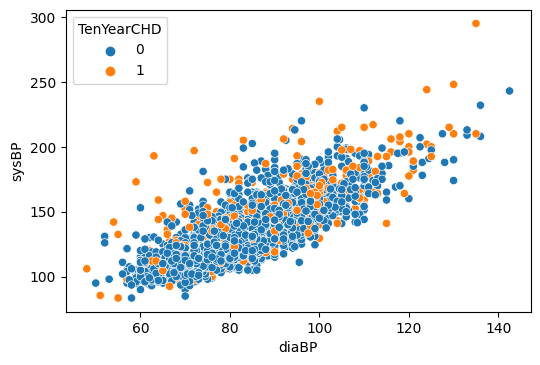

In [ ]:
plt.figure(dpi=100)
sns.scatterplot(data=df1, y='sysBP', x='diaBP', hue='TenYearCHD')

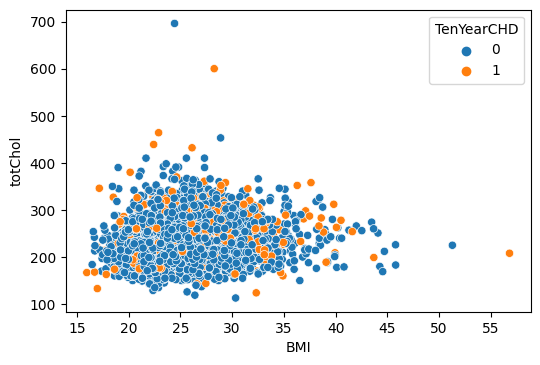

In [ ]:
plt.figure(dpi=100)
sns.scatterplot(data=df1, y='totChol', x='BMI', hue='TenYearCHD')

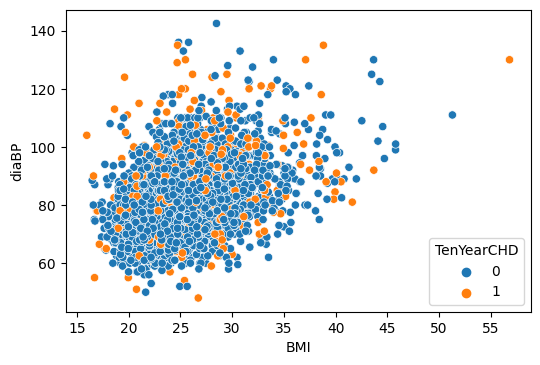

In [ ]:
plt.figure(dpi=100)
sns.scatterplot(data=df1, y='diaBP', x='BMI', hue='TenYearCHD')

In [ ]:
dum = pd.DataFrame(df1.corr()['TenYearCHD'].sort_values()[:-1])
dum

,TenYearCHD
education,-0.052751
heartRate,0.020241
cigsPerDay,0.066778
BMI,0.066947
prevalentStroke,0.068627
BPMeds,0.088020
totChol,0.094306
diabetes,0.103681
diaBP,0.135979
glucose,0.138200


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

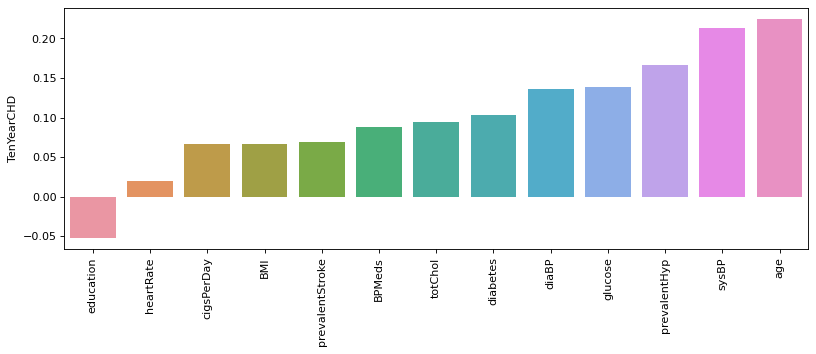

In [ ]:
plt.figure(figsize=(12,4),dpi=80)
sns.barplot(data=dum, x=dum.index, y='TenYearCHD')
plt.xticks(rotation=90)

In [ ]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
df1['glucose']

0        80.0
1        75.0
2        94.0
3        94.0
4        77.0
        ...  
3385    103.0
3386     84.0
3387     72.0
3388     85.0
3389     92.0
Name: glucose, Length: 3390, dtype: float64

## Removing outliers 

In [ ]:
# Function to check the interquartile range for 
def calcIQR(st, data):
    q1 = data[st].quantile(0.25)
    q3 = data[st].quantile(0.85)
    iqr = q3-q1

    UL = q3 + (1.5 * iqr)
    LL = q1 - (1.5 * iqr)
    print('The IQR is ' ,iqr)
    print('The UL is ', UL)
    print('The LL is',LL)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

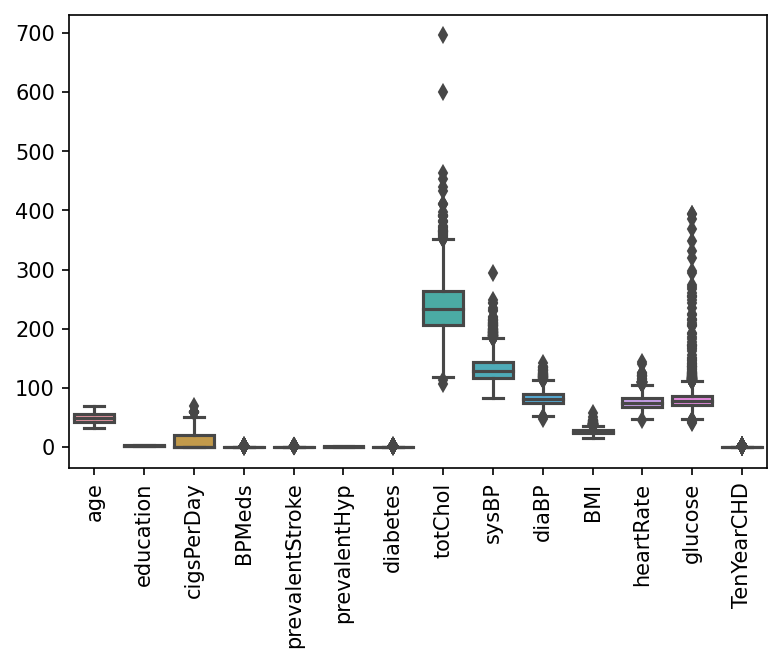

In [ ]:
plt.figure(dpi=150)
sns.boxplot(data = df1)
plt.xticks(rotation=90)

In [ ]:
calcIQR('totChol',df1)

The IQR is  74.34999999999991
The UL is  391.8749999999998
The LL is 94.47500000000014


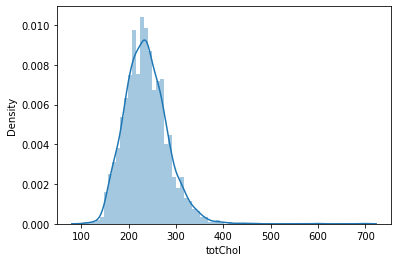

In [ ]:
sns.distplot(df1['totChol'], bins=70)

In [ ]:
df1 = df1[df1['totChol'] < 390]

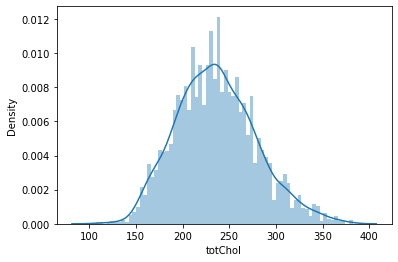

In [ ]:
sns.distplot(df1['totChol'], bins=70)

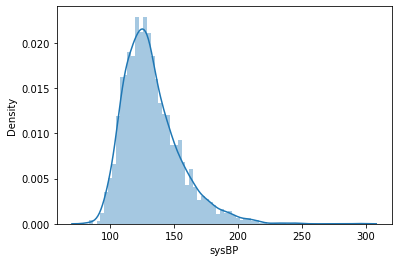

In [ ]:
# Calculating the system BP
sns.distplot(df1['sysBP'], bins=70)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
calcIQR('sysBP', df1)

The IQR is  37.5
The UL is  210.75
The LL is 60.75


In [ ]:
df1 = df1[df1['sysBP']<250]

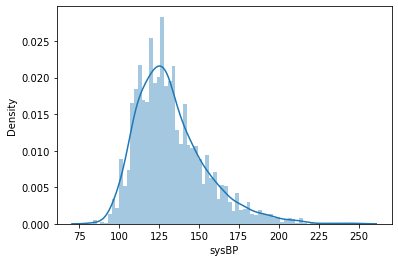

In [ ]:
# Calculating the system BP
sns.distplot(df1['sysBP'], bins=70) 

In [ ]:
df1['glucose'].describe()

count    3061.000000
mean       82.057824
std        24.281470
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [ ]:
df1[df1['glucose']>300]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
312,46,2.0,F,YES,15.0,0.0,0,0,1,233.0,106.0,60.0,20.84,75.0,348.0,0
1032,67,2.0,F,NO,0.0,1.0,0,1,1,303.0,204.0,96.0,27.86,75.0,394.0,1
1156,47,1.0,F,YES,1.0,0.0,0,1,1,160.0,197.0,109.0,34.91,82.0,320.0,1
1587,62,3.0,M,NO,0.0,0.0,0,0,1,346.0,102.5,66.5,17.17,80.0,394.0,1
2188,62,3.0,F,YES,20.0,1.0,0,1,1,358.0,215.0,110.0,37.62,110.0,368.0,1
2703,47,2.0,M,YES,20.0,0.0,0,1,1,296.0,141.0,93.0,28.50,68.0,332.0,1
3042,62,1.0,F,NO,0.0,0.0,0,0,1,233.0,130.0,87.0,21.34,85.0,386.0,0


## Imputing Null values

In [ ]:
df1['glucose'] = df1['glucose'].fillna(df1['glucose'].median())

In [ ]:
df1.isnull().sum()

age                 0
education          85
sex                 0
is_smoking          0
cigsPerDay         22
BPMeds             42
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                14
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [ ]:
df1 = df1.dropna(axis=0)

In [ ]:
df1.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
df1['TenYearCHD'].value_counts()

0    2705
1     470
Name: TenYearCHD, dtype: int64

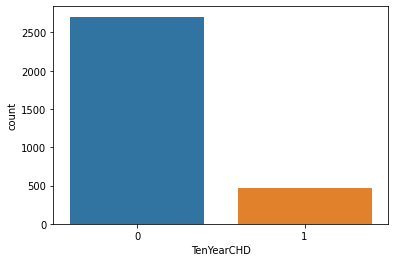

In [ ]:
sns.countplot(data=df1, x='TenYearCHD')

Here, we have very imbalanced dataset so we shall try to resolve it first

### What is imbalanced data?

- Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations. We can better understand it with an example.


#### Methods to handle imbalanced dataset

- Resampling
- SMOTE (Synthetic Minority Oversampling Technique)
- BalancedBaggingClassifier

We shall use Resampling Technique here to resample our imbalanced dataset

In [ ]:
df1.duplicated().sum()

0

In [ ]:
from sklearn.utils import resample

In [ ]:
# Resampling the minority classs as this strategy can be changed anytime 
# Creating two data frames for majority and minority class

df1_maj = df1[(df1['TenYearCHD'] == 0)]
df1_min = df1[(df1['TenYearCHD'] == 1)]

# Upsampling the minority class

df1_min_unsampled = resample(df1_min,
                            replace=True,
                            n_samples=2705,
                            random_state=101)

#Combining the majority to the minority class
df1_up = pd.concat([df1_min_unsampled, df1_maj]) 

In [ ]:
df1_up.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2551,48,1.0,M,YES,35.0,0.0,0,0,0,263.0,132.0,91.0,40.08,90.0,91.0,1
80,40,4.0,M,NO,0.0,0.0,0,0,0,161.0,122.0,85.0,30.80,75.0,85.0,1
2436,53,2.0,M,YES,20.0,0.0,0,1,0,266.0,163.0,105.0,28.04,90.0,79.0,1
2355,57,3.0,M,NO,0.0,0.0,0,0,0,213.0,141.0,90.0,30.77,60.0,77.0,1
490,49,1.0,F,YES,5.0,0.0,0,0,0,350.0,135.0,86.5,25.56,75.0,83.0,1


In [ ]:
df1_up['TenYearCHD'].value_counts()

1    2705
0    2705
Name: TenYearCHD, dtype: int64

In [ ]:
df1_up[df1_up.duplicated()]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
490,49,1.0,F,YES,5.0,0.0,0,0,0,350.0,135.0,86.5,25.56,75.0,83.0,1
322,56,1.0,F,YES,40.0,0.0,0,1,0,214.0,147.0,65.0,17.68,110.0,87.0,1
2725,50,2.0,M,NO,0.0,0.0,0,0,0,296.0,129.0,85.0,25.86,56.0,106.0,1
2894,52,1.0,M,YES,20.0,0.0,0,1,0,283.0,145.0,79.0,30.12,72.0,78.0,1
3155,63,1.0,F,NO,0.0,0.0,0,1,0,275.0,148.0,75.0,28.87,70.0,83.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,65,1.0,M,YES,20.0,1.0,0,1,0,246.0,179.0,96.0,19.34,95.0,76.0,1
2252,60,4.0,M,YES,30.0,0.0,0,0,0,243.0,126.0,79.0,28.57,80.0,65.0,1
3140,51,2.0,F,YES,20.0,0.0,0,0,0,326.0,112.0,83.0,20.82,104.0,70.0,1
400,58,2.0,F,NO,0.0,0.0,0,1,1,240.0,150.0,80.0,26.45,66.0,255.0,1


#### Now that we have balanced dataset

In [ ]:
df1_up.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2551,48,1.0,M,YES,35.0,0.0,0,0,0,263.0,132.0,91.0,40.08,90.0,91.0,1
80,40,4.0,M,NO,0.0,0.0,0,0,0,161.0,122.0,85.0,30.80,75.0,85.0,1
2436,53,2.0,M,YES,20.0,0.0,0,1,0,266.0,163.0,105.0,28.04,90.0,79.0,1
2355,57,3.0,M,NO,0.0,0.0,0,0,0,213.0,141.0,90.0,30.77,60.0,77.0,1
490,49,1.0,F,YES,5.0,0.0,0,0,0,350.0,135.0,86.5,25.56,75.0,83.0,1


## Train | Test | Split and Scaling 

In [ ]:
# Importing the train test split
from sklearn.model_selection import train_test_split

In [ ]:
X = df1_up.drop('TenYearCHD', axis=1)
y = df1_up['TenYearCHD']

In [ ]:
# Converting to Dummies
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_M,is_smoking_YES
2551,48,1.0,35.0,0.0,0,0,0,263.0,132.0,91.0,40.08,90.0,91.0,1,1
80,40,4.0,0.0,0.0,0,0,0,161.0,122.0,85.0,30.80,75.0,85.0,1,0
2436,53,2.0,20.0,0.0,0,1,0,266.0,163.0,105.0,28.04,90.0,79.0,1,1
2355,57,3.0,0.0,0.0,0,0,0,213.0,141.0,90.0,30.77,60.0,77.0,1,0
490,49,1.0,5.0,0.0,0,0,0,350.0,135.0,86.5,25.56,75.0,83.0,0,1


In [ ]:
#Let's drop the umwanted rows like smoking_N and Sex_F
# X = X.drop(['is_smoking_NO','sex_F'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Scaling the data 
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [ ]:
def predict(model, X_train, y_train, X_test, y_test):
    #Fitting the data
    model.fit(X_train, y_train)
    
    # Predicting on test set
    preds = model.predict(X_test)
    
    # Classification Report
    print(classification_report(y_test, preds))
#     print('*******************************************************')
    
    # Plot confusion matrix
    plot_confusion_matrix(model, X_test, y_test)
    print('*******************************************************')
    
    #Calculate Accuracy
    print('The accuracy :',accuracy_score(y_test, preds)*100)
    print('*******************************************************')
    
    #Plot precision recall curve
    plot_precision_recall_curve(model, X_test, y_test)
#     print('*******************************************************')
    
    #Plot ROC curve
    plot_roc_curve(model, X_test, y_test)

## Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
log_model = LogisticRegression()

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       805
           1       0.67      0.66      0.66       818

    accuracy                           0.66      1623
   macro avg       0.66      0.66      0.66      1623
weighted avg       0.66      0.66      0.66      1623

*******************************************************
The accuracy : 66.05052372150338
*******************************************************


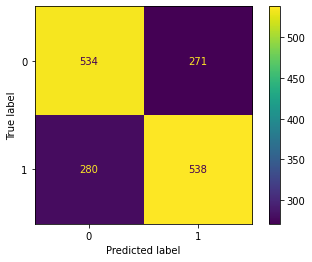

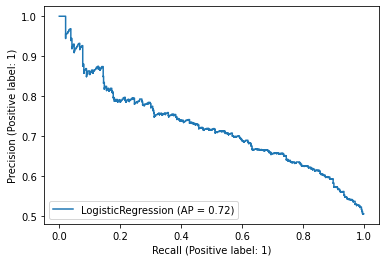

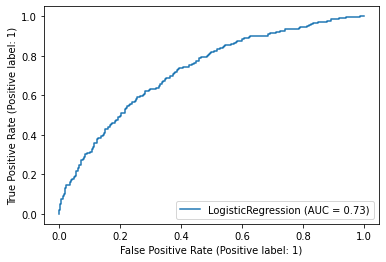

In [ ]:
# Calling the predict function 
predict(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

## K Nearest Neighbour (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
knn = KNeighborsClassifier()
scaler = StandardScaler()

In [ ]:
operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)

In [ ]:
k_values = list(range(1,30))

In [ ]:
param_grid = {'knn__n_neighbors' : k_values}

In [ ]:
grid_model = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       805
           1       0.87      0.99      0.92       818

    accuracy                           0.92      1623
   macro avg       0.93      0.92      0.92      1623
weighted avg       0.93      0.92      0.92      1623

*******************************************************
The accuracy : 91.74368453481208
*******************************************************


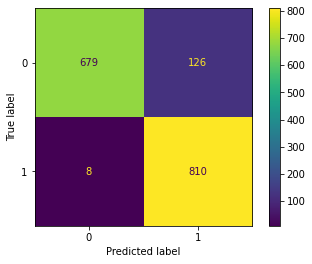

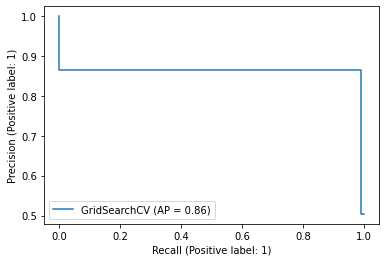

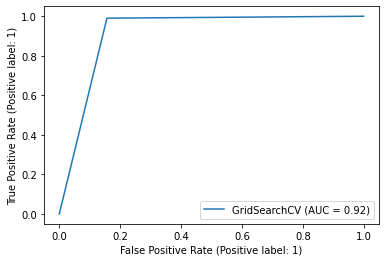

In [ ]:
predict(grid_model, X_train, y_train, X_test, y_test)

In [ ]:
grid_model.best_estimator_.get_params()

{'knn': KNeighborsClassifier(n_neighbors=1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': None,
 'scaler': StandardScaler(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False}

In [ ]:
grid_model.cv_results_['mean_test_score']

array([0.8938474 , 0.85450414, 0.80090309, 0.77423136, 0.75178614,
       0.73224748, 0.71217694, 0.71349411, 0.70187799, 0.70583751,
       0.69817848, 0.6902542 , 0.68735217, 0.69156928, 0.69526809,
       0.69394987, 0.69580032, 0.69500667, 0.68998965, 0.69210012,
       0.69289795, 0.68682586, 0.68708344, 0.68048121, 0.67704764,
       0.6791602 , 0.67995211, 0.67572803, 0.67652133])

Text(0, 0.5, 'Accuracy')

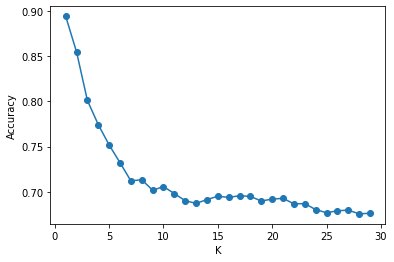

In [ ]:
scores = grid_model.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       805
           1       0.86      0.99      0.92       818

    accuracy                           0.91      1623
   macro avg       0.92      0.91      0.91      1623
weighted avg       0.92      0.91      0.91      1623

*******************************************************
The accuracy : 91.1275415896488
*******************************************************


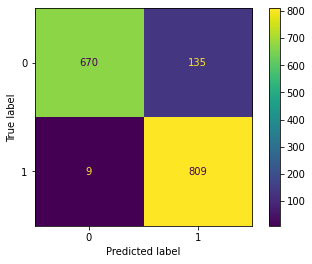

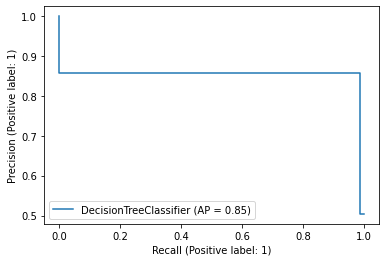

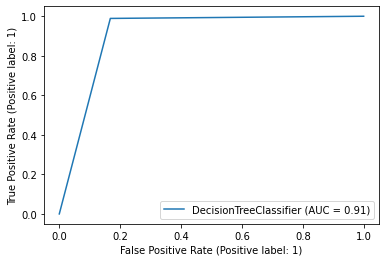

In [ ]:
dct = DecisionTreeClassifier()
predict(dct, X_train_scaled, y_train, X_test_scaled, y_test)

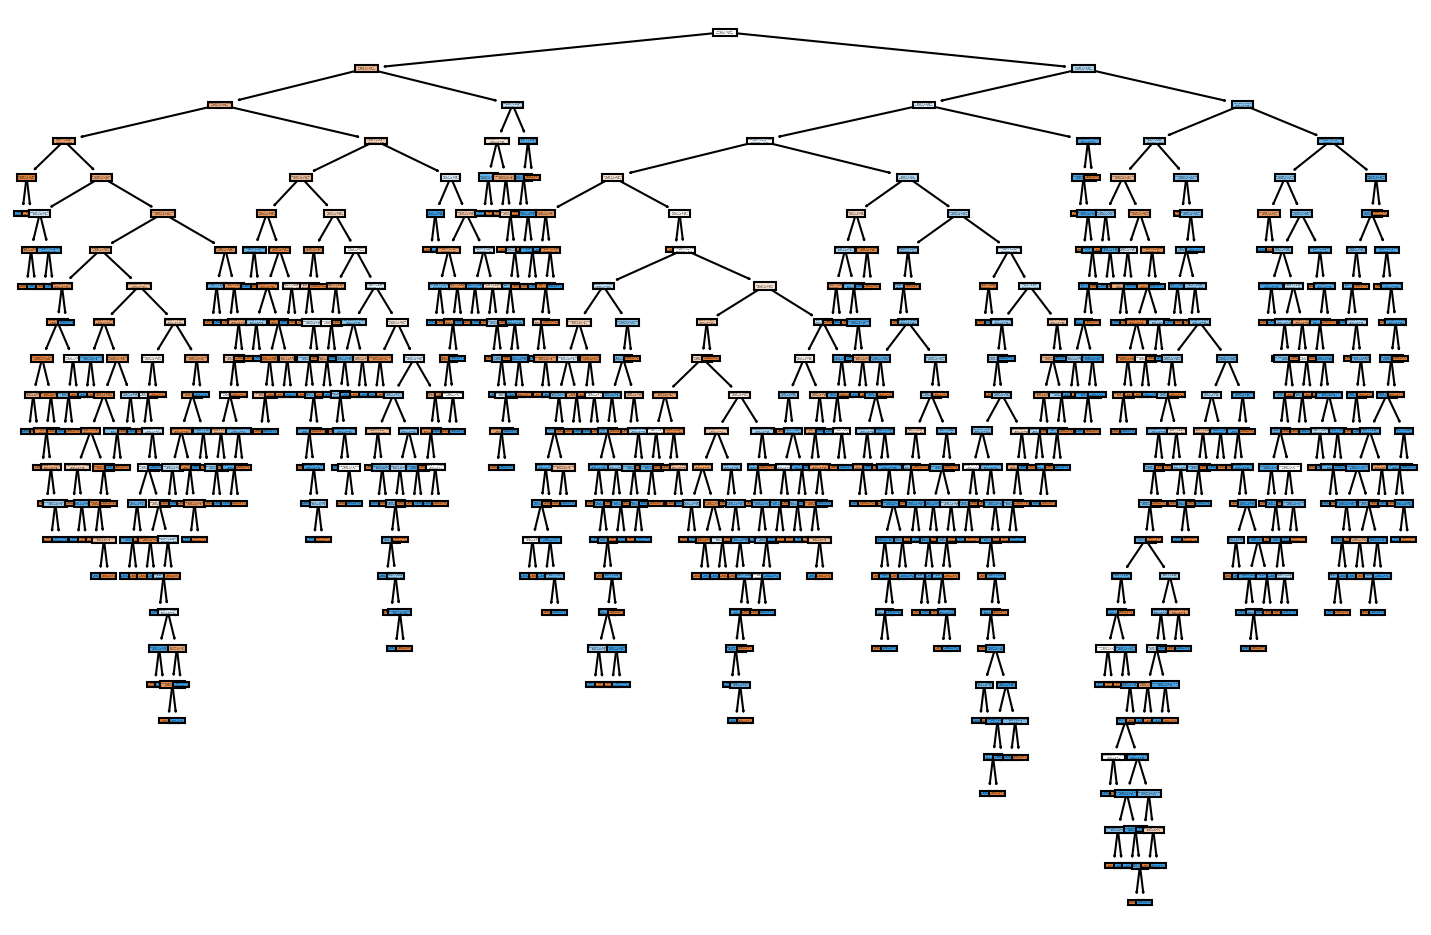

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dct,filled=True,feature_names=X.columns);

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       805
           1       0.95      0.99      0.97       818

    accuracy                           0.97      1623
   macro avg       0.97      0.97      0.97      1623
weighted avg       0.97      0.97      0.97      1623

*******************************************************
The accuracy : 96.73444239063463
*******************************************************


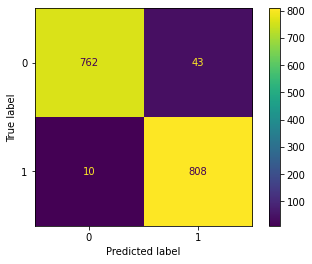

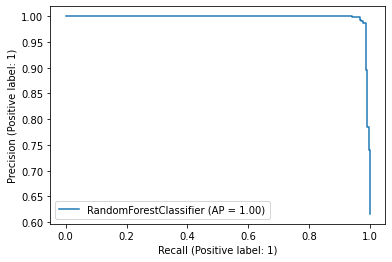

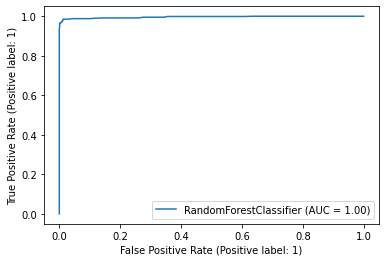

In [ ]:
predict(rfc, X_train_scaled, y_train, X_test_scaled, y_test)

# XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       805
           1       0.72      0.74      0.73       818

    accuracy                           0.73      1623
   macro avg       0.73      0.73      0.73      1623
weighted avg       0.73      0.73      0.73      1623

*******************************************************
The accuracy : 72.64325323475046
*******************************************************


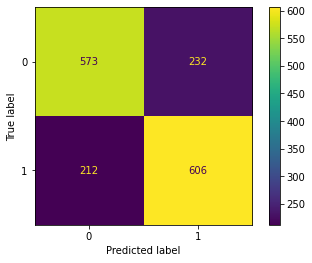

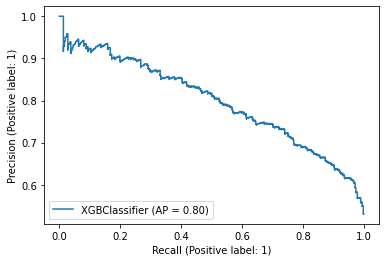

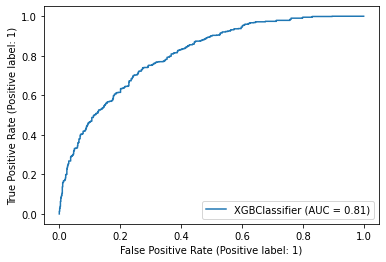

In [ ]:
predict(xgb, X_train_scaled, y_train, X_test_scaled, y_test)

In [ ]:
x = np.random.rand(4, 5)

y = np.sum(x, axis=1)

In [ ]:
y.shape

(4,)